In [1]:
import numpy as np
import matplotlib.pyplot as plt

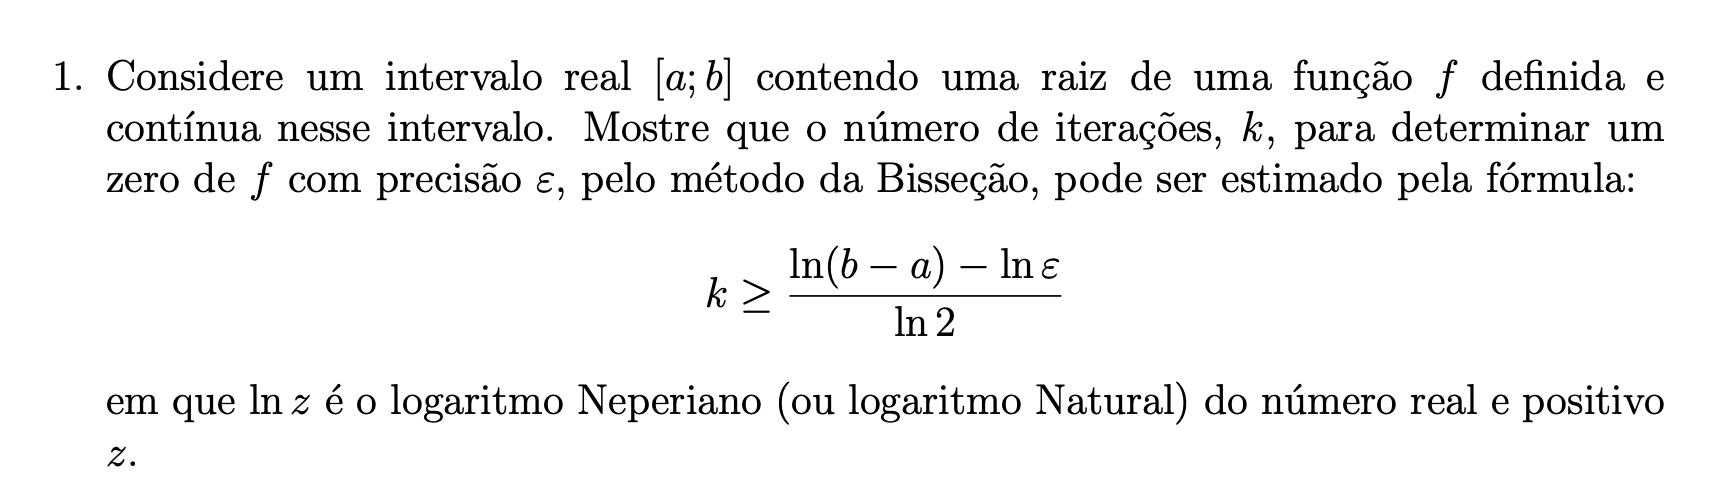

A cada iteração a distância entre a aproximação $x_k$ e o zero da função $x_*$ é menor ou igual à metade do intervalo $\left[ a_k, b_k  \right]$:

$\left| x_k - x_* \right| \leq \dfrac{b_k - a_k}{2}$

Por construção do método da Bisseção temos que:

$b_k - a_k = \dfrac{b_{k-1} - a_{k-1}}{2}$

Logo,

$\dfrac{b_k - a_k}{2^1} = \dfrac{b_{k-1} - a_{k-1}}{2^{1+1}} = \dfrac{b_{k-2} - a_{k-2}}{2^{2+1}} = \ldots = \dfrac{b_{k-k} - a_{k-k}}{2^{k+1}} $

Portanto,

$\left| x_k - x_* \right| \leq \dfrac{b - a}{2^{k+1}}, \;\; \forall k \geq 0$

Considerando um intervalo $\left[ a, b\right]$ e tolerância $\epsilon$:

$\dfrac{b - a}{2^{k+1}} \lt \epsilon$

$\dfrac{b - a}{2^k \cdot 2^1} \lt \epsilon$

$\dfrac{2^{-k}(b - a)}{2} \lt \epsilon$

$2^{-k}(b - a) \lt 2 \epsilon$

$2^{-k} \lt \dfrac{2 \epsilon}{b - a}$

$-k \lt \log_2 \left(2 \dfrac{2 \epsilon}{b - a} \right)$

$k \gt -\log_2 \left(\dfrac{4 \epsilon}{b - a} \right)$

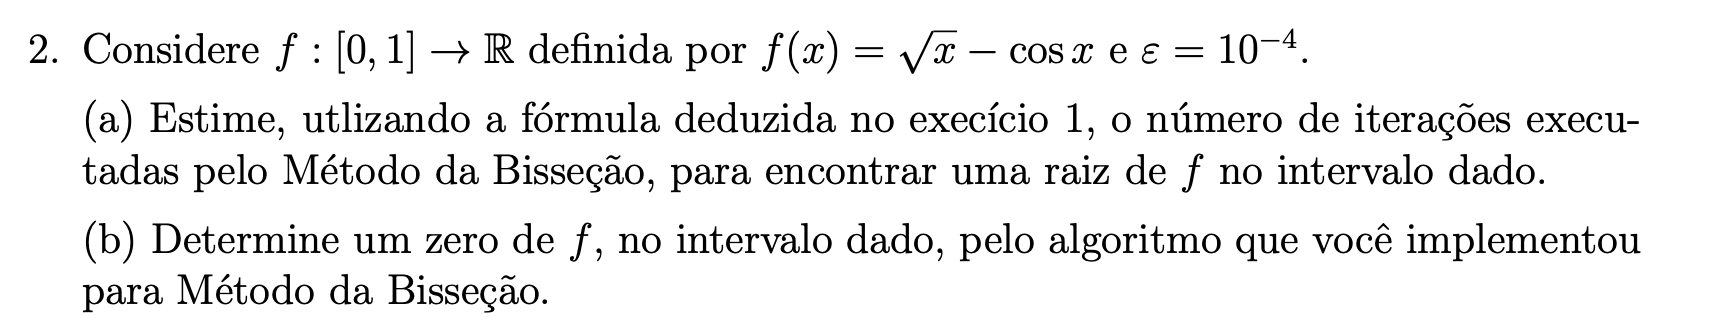

a)

$k \gt -\log_2 \left(\dfrac{4 \cdot 10^{-4}}{1 - 0} \right)$

$k \gt 11.28$

In [2]:
def estimar_k(a, b, e):
    est = -np.log2((4*e) / (b - a))
    return print(f'k > {est}')

In [3]:
estimar_k(a=0, b=1, e=10**(-4))

k > 11.287712379549449


<hr>

b)

In [4]:
def bissecao(F_OBJ, a, b, TOL, K_MAX=100):

    def tem_raiz(a,b):
        return F_OBJ(a)*F_OBJ(b) < 0

    def atende_criterio_parada(a,b):
        return np.abs(b-a) <= TOL

    def estimar_x(a,b):
        return (a+b)/2

    if not tem_raiz(a,b):
        print("O intervalo escolhido não possui uma raíz")
        return None
    if atende_criterio_parada(a,b):
        print("O intervalo inicial já possui a precisão especificada")
        return None
    k = 0
    while k < K_MAX:
        k += 1

        # Calcula o ponto medio:
        x_0 = estimar_x(a,b)

        # Define o lado:
        if tem_raiz(a,x_0):
            b = x_0
        else:
            a = x_0

        # Checa o critério de parada:
        if atende_criterio_parada(a,b):
            return {'num_iter': k, 'x_est': x_0}

    print("Número máximo de iterações atingido")

In [5]:
def f(x): return np.sqrt(x) - np.cos(x)

a = 0
b = 1
e = 10**(-4)

bissecao(f, a, b, e)

{'num_iter': 14, 'x_est': 0.64166259765625}

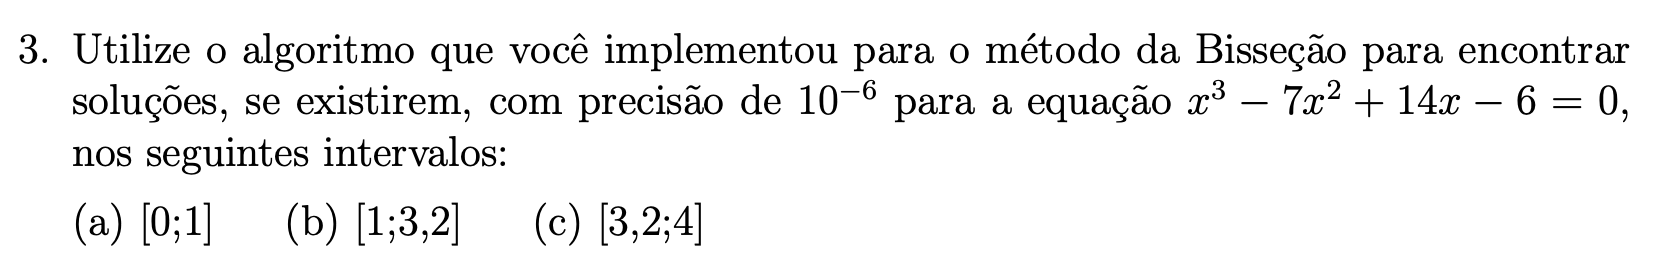

In [6]:
def f(x): return x**3 - 7*x**2 + 14*x - 6

e = 10**(-6)

In [7]:
# a)

a = 0
b = 1

In [8]:
estimar_k(a,b,e)

k > 17.931568569324174


In [9]:
bissecao(f, a, b, e)

{'num_iter': 20, 'x_est': 0.5857858657836914}

In [10]:
# b)

a = 1
b = 3.2

In [11]:
estimar_k(a,b,e)

k > 19.06907209307411


In [12]:
bissecao(f, a, b, e)

{'num_iter': 22, 'x_est': 2.9999996662139896}

In [13]:
# c)

a = 3.2
b = 4

In [14]:
estimar_k(a,b,e)

k > 17.609640474436812


In [15]:
bissecao(f, a, b, e)

{'num_iter': 20, 'x_est': 3.414214324951172}

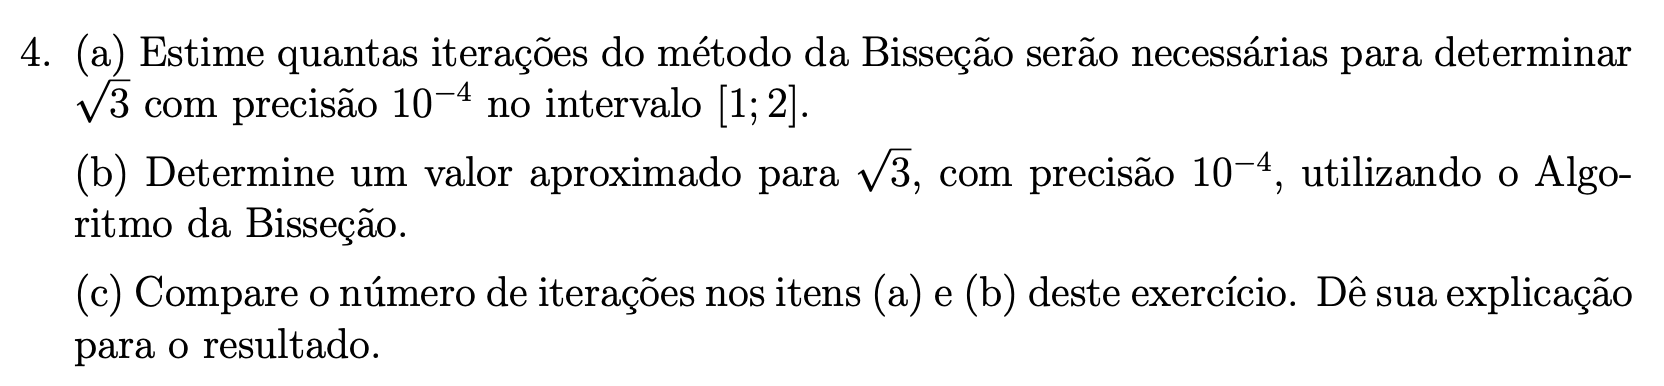

In [16]:
# a)

a = 1
b = 2
e = 10**(-4)

estimar_k(a,b,e)

k > 11.287712379549449


<hr>

b)

$x = \sqrt{3}$

$x^2 = 3$

$x^2 - 3 = 0$

$f(x) = x^2 - 3$

In [17]:
def f(x): return x**2 - 3

In [18]:
bissecao(f, a, b, e)

{'num_iter': 14, 'x_est': 1.73199462890625}

In [19]:
np.sqrt(3)

1.7320508075688772

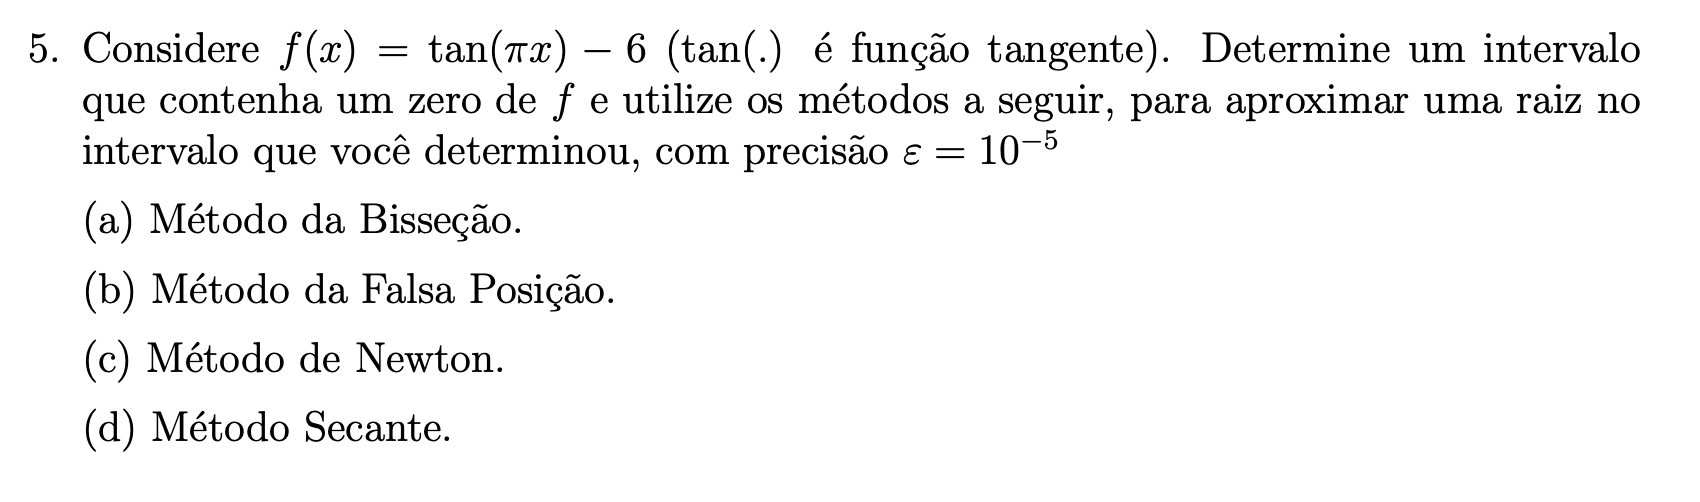

In [20]:
def falsa_posicao(F_OBJ, a, b, TOL, K_MAX=100):

    def tem_raiz(a,b):
        return F_OBJ(a)*F_OBJ(b) < 0

    def atende_criterio_parada(a,b):
        return np.abs(b-a) <= TOL

    def estimar_x(a,b):
        return (a*F_OBJ(b) - b*F_OBJ(a)) / (F_OBJ(b) - F_OBJ(a))
    
    def e_raiz_estimada(x):
        return np.abs(F_OBJ(x)) < TOL

    if not tem_raiz(a,b):
        print("O intervalo escolhido não possui uma raíz")
        return None
    if atende_criterio_parada(a,b):
        print("O intervalo inicial já possui a precisão especificada")
        return None
    if e_raiz_estimada(a):
        print('f(a) é menor que a precisão especificada')
        return
    if e_raiz_estimada(b):
        print('f(b) é menor que a precisão especificada')
        return
    k = 0
    while k < K_MAX:
        k += 1

        # Calcula o ponto medio:
        x_0 = estimar_x(a,b)
        
        if e_raiz_estimada(x_0):
            return {'num_iter': k, 'x_est': x_0}

        # Define o lado:
        if tem_raiz(a,x_0):
            b = x_0
        else:
            a = x_0

        # Checa o critério de parada:
        if atende_criterio_parada(a,b):
            return {'num_iter': k, 'x_est': x_0}

    print("Número máximo de iterações atingido")
    
    
    
    
def newton(F_OBJ, F_PRIME, X_INI, TOL, K_MAX=100):
    x_last = X_INI
    k = 0
    
    while k < K_MAX:
        k += 1
        x_0 = x_last - F_OBJ(x_last) / F_PRIME(x_last)
        if np.abs(x_0 - x_last) < TOL:
            return {'num_iter': k, 'x_est': x_0}
        x_last = x_0
    print("Número máximo de iterações atingido")
    
    

    
def secante(F_OBJ, X_INI, X_INI_2, TOL, K_MAX=100):
    x_temp = X_INI_2
    x_last = X_INI
    k = 0
    
    while k < K_MAX:
        k += 1
        x_0 = x_last - F_OBJ(x_last) * ((x_last - x_temp) / (F_OBJ(x_last) - F_OBJ(x_temp)))
        if np.abs(x_0 - x_last) < TOL:
            return {'num_iter': k, 'x_est': x_0}
        x_temp = x_last
        x_last = x_0
    print("Número máximo de iterações atingido")

(-1.0, 1.0)

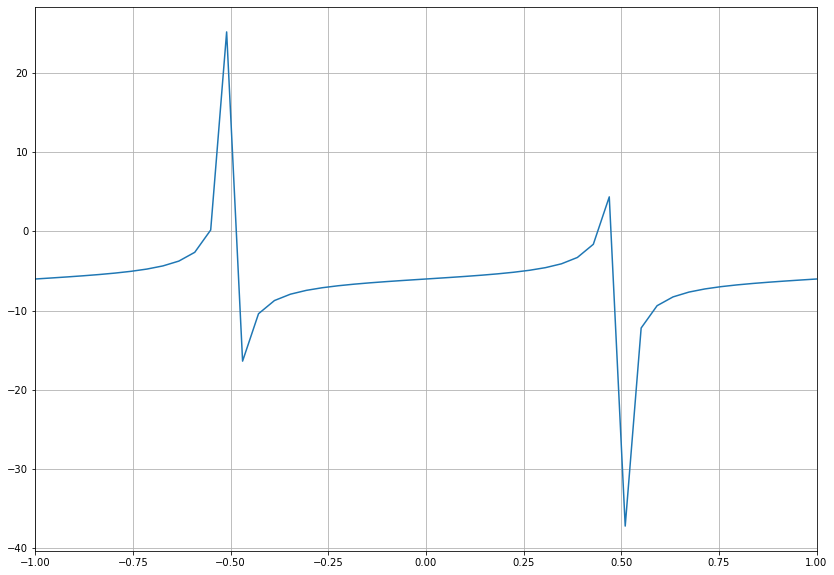

In [21]:
def f(x): return np.tan(np.pi*x) - 6
e = 10**(-5)

plt.figure(figsize=(14,10))
xx = np.linspace(-1,1)
plt.plot(xx,f(xx))
plt.grid()
plt.xlim([-1,1])

In [22]:
a = 0.42
b = 0.48

In [23]:
# a) Bisseção:

bissecao(f, a, b, e)

{'num_iter': 13, 'x_est': 0.44742919921874996}

In [24]:
# b) Falsa posição:

falsa_posicao(f, a, b, e)

{'num_iter': 27, 'x_est': 0.44743148284581014}

In [25]:
# c) Newton-Raphson

def f_prime(x): return np.pi * (1 / np.cos(np.pi * x))**2

newton(f, f_prime, a, e)

{'num_iter': 5, 'x_est': 0.44743154331973345}

In [26]:
# d) Secante:

secante(f, a, b, e)

{'num_iter': 7, 'x_est': 0.4474315432010906}

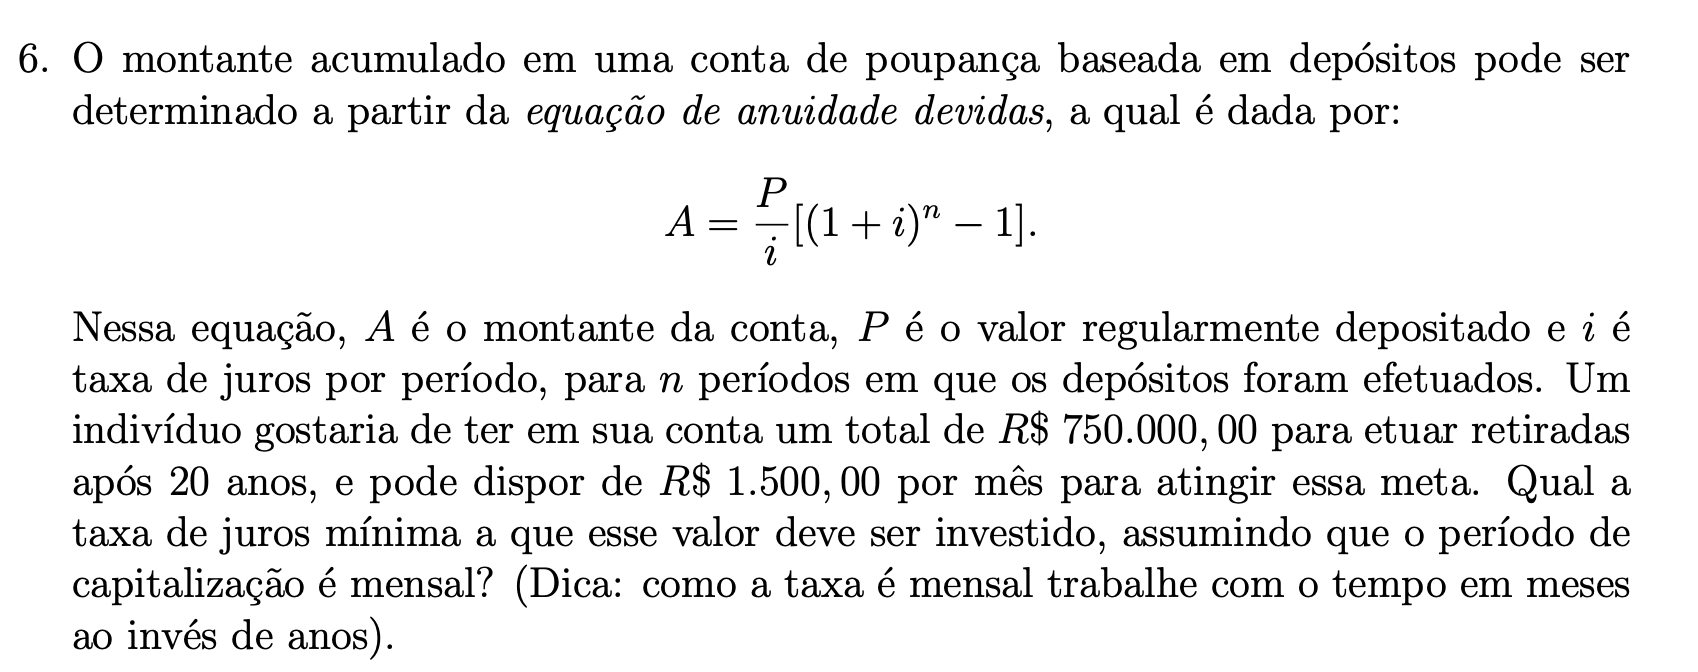

In [27]:
def f(i): return 1500/i * ((1 + i)**240 - 1) - 750000

a = 0.001
b = 1
e = 10**(-6)

In [28]:
bissecao(f, a, b, e)

{'num_iter': 20, 'x_est': 0.005551146507263183}

In [29]:
i = 0.005551146507263183

1500/i * ((1 + i)**240 - 1)

750039.519857203

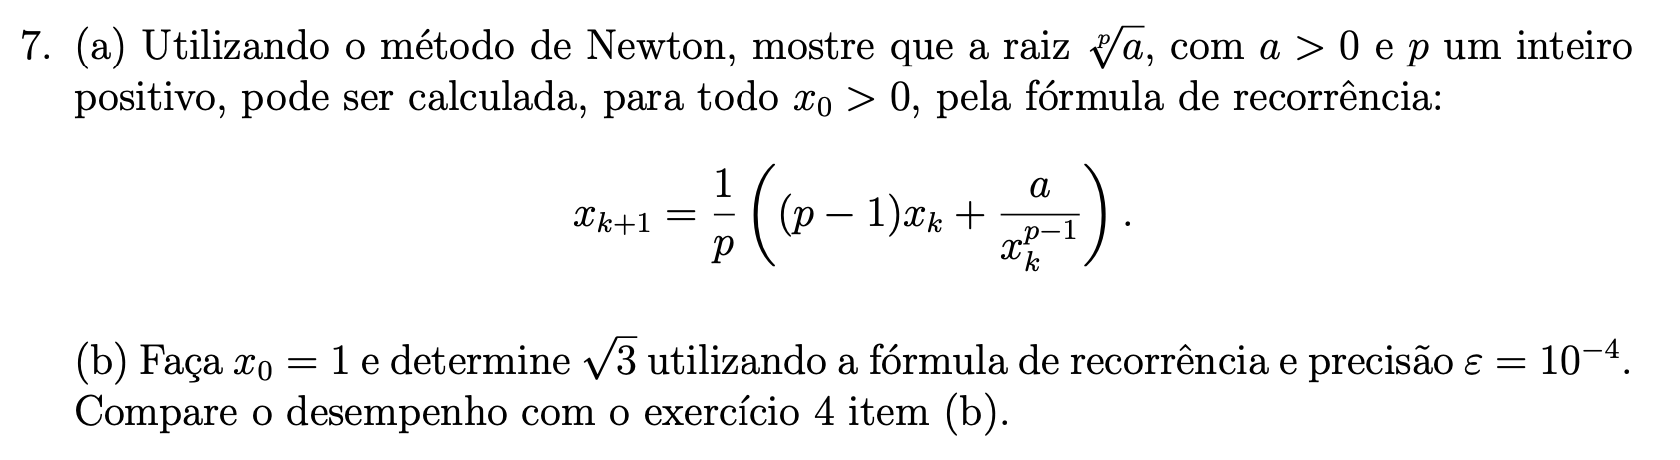

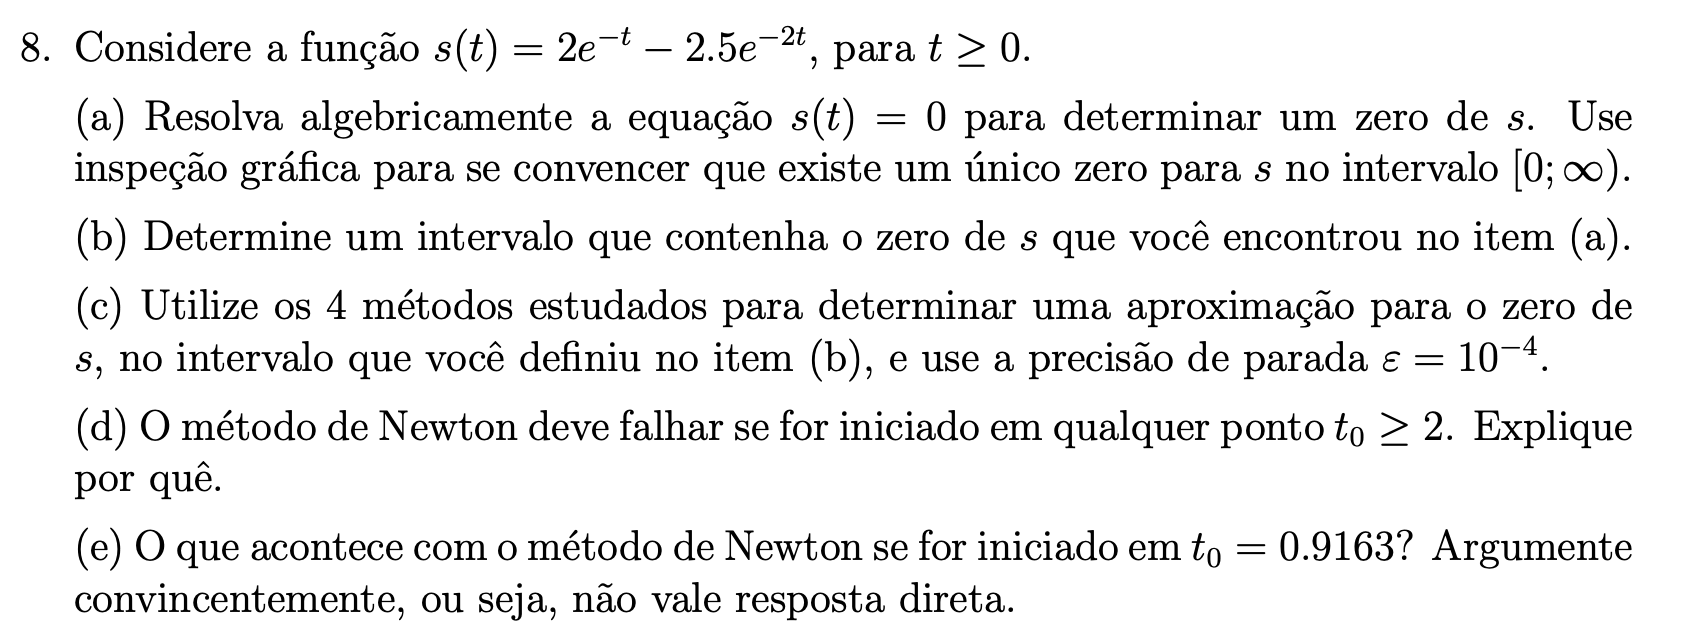

a)

$2e^{-t} - 2.5e^{-2t} = 0$

$2e^{-t} = 2.5e^{-2t}$

$e^{-t} = \dfrac{2.5e^{-2t}}{2}$

$e^{-t} = 1.25e^{-2t}$

$e^{-t} = 1.25e^{-t}e^{-t}$

$\dfrac{e^{-t}}{e^{-t}} = 1.25e^{-t}$

$1.25e^{-t} = 1$

$e^{-t} = \dfrac{1}{1.25}$

$-t = \ln{\dfrac{1}{1.25}}$

$t = -\ln{\dfrac{1}{1.25}}$

$t = 0.2231435513142097$

In [30]:
def s(t): return 2*np.exp(-t) - 2.5*np.exp(-2*t)

t = -np.log(1/1.25)

s(t)

0.0

(-1.0, 1.0)

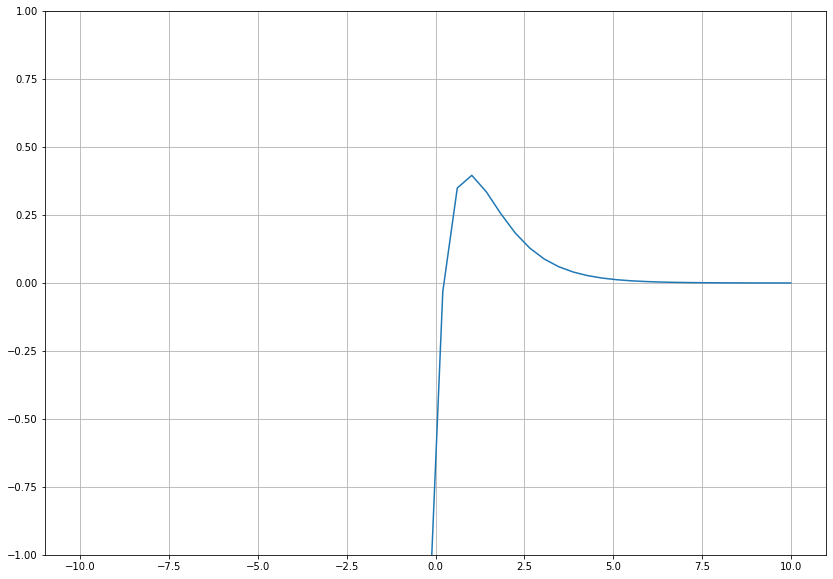

In [31]:
plt.figure(figsize=(14,10))
xx = np.linspace(-10,10)
plt.plot(xx,s(xx))
plt.grid()
plt.ylim([-1,1])

In [32]:
# b)

a = 0
b = 1
e = 10**(-4)

In [33]:
# c)

# Bisseção:

bissecao(s, a, b, e)

{'num_iter': 14, 'x_est': 0.22308349609375}

In [34]:
s(0.22308349609375)

-9.609700905044427e-05

In [35]:
# Falsa posição:

falsa_posicao(s, a, b, e)

{'num_iter': 9, 'x_est': 0.2231630948250297}

In [36]:
s(0.2231630948250297)

3.126870064873444e-05

In [37]:
# Secante:

secante(s, 0, 1, e)

{'num_iter': 7, 'x_est': 0.22314365163838565}

In [38]:
s(0.22314365163838565)

1.6051865725508208e-07

In [39]:
# Newton:

def s_prime(t): return -2*np.exp(-2*t) * (np.exp(t) - 2.5)

newton(s, s_prime, a, e)

{'num_iter': 4, 'x_est': 0.2231435500383377}

In [44]:
s(0.2231435500383377)

-2.041395275043101e-09

In [45]:
# d)

newton(s, s_prime, 0.9, e)

{'num_iter': 64, 'x_est': 0.2231435382707884}

In [46]:
newton(s, s_prime, 1, e)

Número máximo de iterações atingido


In [47]:
# e)

newton(s, s_prime, 0.9163, e)

Número máximo de iterações atingido


<ipython-input-39-dbe7c9b1219a>:3: RuntimeWarning: overflow encountered in exp
  def s_prime(t): return -2*np.exp(-2*t) * (np.exp(t) - 2.5)
<ipython-input-39-dbe7c9b1219a>:3: RuntimeWarning: invalid value encountered in double_scalars
  def s_prime(t): return -2*np.exp(-2*t) * (np.exp(t) - 2.5)


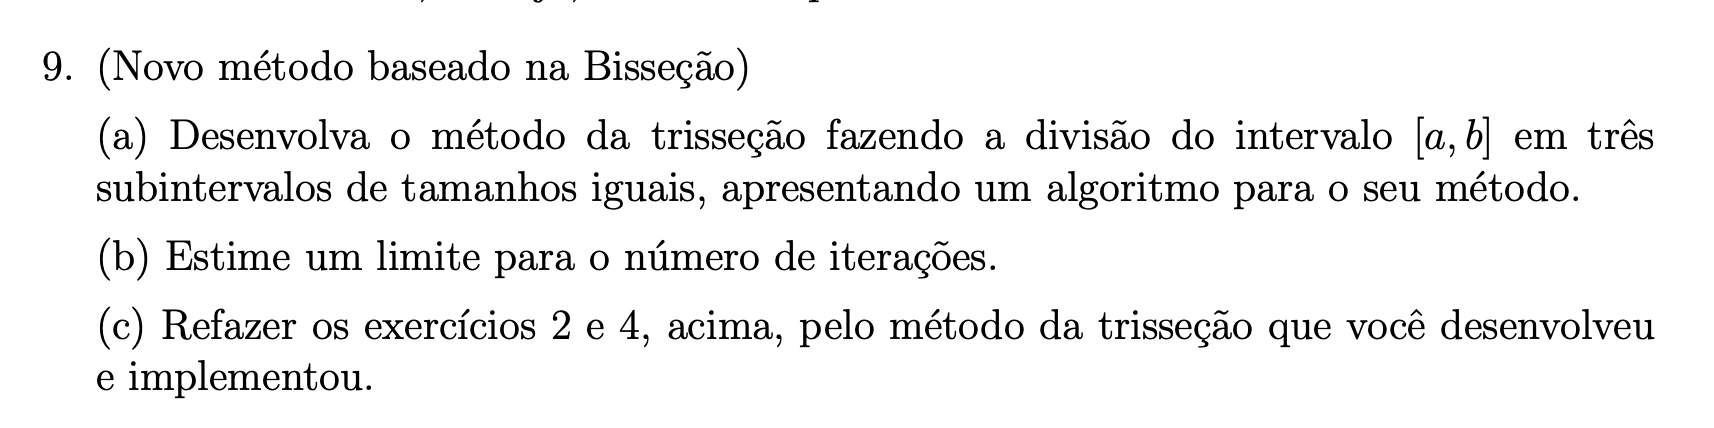

In [48]:
# a)

import numpy as np

def trissecao(F_OBJ, a, b, TOL, K_MAX=100):

    def tem_raiz(a,b):
        return F_OBJ(a)*F_OBJ(b) < 0

    def atende_criterio_parada(a,b):
        return np.abs(b-a) <= TOL

    if not tem_raiz(a,b):
        print("O intervalo escolhido não possui uma raíz")
        return None
    if atende_criterio_parada(a,b):
        print("O intervalo inicial já possui a precisão especificada")
        return None
    k = 0
    while k < K_MAX:
        k += 1
        print(f'Iteração {k}')
        
        # Calcula os pontos de intervalo
        
        print(f'>>> a e b: {[a,b]}')
        
        p1 = a + (b - a)/3
        p2 = b - (b - a)/3
        
        print(f'>>> p1 e p2: {[p1,p2]}')
        
        # Verifica qual intervalo tem a raiz:
        if tem_raiz(a, p1):
            b = p1
            x_0 = p1
        elif tem_raiz(p1, p2):
            a = p1
            b = p2
            x_0 = p2
        else:
            a = p2
            x_0 = b

        # Checa o critério de parada:
        if atende_criterio_parada(a,b):
            return {'num_iter': k, 'x_est': x_0}

    print("Número máximo de iterações atingido")

A cada iteração a distância entre a aproximação $x_k$ e o zero da função $x_*$ é menor ou igual à 1/3 do intervalo $\left[ a_k, b_k  \right]$:

$\left| x_k - x_* \right| \leq \dfrac{b_k - a_k}{3}$

Por construção do método da Trisseção temos que:

$b_k - a_k = \dfrac{b_{k-1} - a_{k-1}}{3}$

Logo,

$\dfrac{b_k - a_k}{3^1} = \dfrac{b_{k-1} - a_{k-1}}{3^{1+1}} = \dfrac{b_{k-2} - a_{k-2}}{3^{2+1}} = \ldots = \dfrac{b_{k-k} - a_{k-k}}{3^{k+1}} $

Portanto,

$\left| x_k - x_* \right| \leq \dfrac{b - a}{3^{k+1}}, \;\; \forall k \geq 0$

Considerando um intervalo $\left[ a, b\right]$ e tolerância $\epsilon$:

$\dfrac{b - a}{3^{k+1}} \lt \epsilon$

$\dfrac{b - a}{3^k \cdot 3^1} \lt \epsilon$

$\dfrac{3^{-k}(b - a)}{3} \lt \epsilon$

$3^{-k}(b - a) \lt 3 \epsilon$

$3^{-k} \lt \dfrac{3 \epsilon}{b - a}$

$-k \lt \log_3 \left(3 \dfrac{3 \epsilon}{b - a} \right)$

$k \gt -\log_3 \left(\dfrac{9 \epsilon}{b - a} \right)$


In [49]:
def estimar_k_trissecao(a, b, e):
    est = - np.log((9*e) / (b - a)) / np.log(3)
    return print(f'k > {est}')

In [50]:
# c)

# Exercício 2:

def f(x): return np.sqrt(x) - np.cos(x)

a = 0
b = 1
e = 10**(-4)

bissecao(f, a, b, e)

{'num_iter': 14, 'x_est': 0.64166259765625}

In [51]:
estimar_k_trissecao(a, b, e)

k > 6.383613097157538


In [52]:
trissecao(f, a, b, e)

Iteração 1
>>> a e b: [0, 1]
>>> p1 e p2: [0.3333333333333333, 0.6666666666666667]
Iteração 2
>>> a e b: [0.3333333333333333, 0.6666666666666667]
>>> p1 e p2: [0.4444444444444445, 0.5555555555555556]
Iteração 3
>>> a e b: [0.5555555555555556, 0.6666666666666667]
>>> p1 e p2: [0.5925925925925927, 0.6296296296296297]
Iteração 4
>>> a e b: [0.6296296296296297, 0.6666666666666667]
>>> p1 e p2: [0.6419753086419754, 0.654320987654321]
Iteração 5
>>> a e b: [0.6296296296296297, 0.6419753086419754]
>>> p1 e p2: [0.6337448559670782, 0.6378600823045268]
Iteração 6
>>> a e b: [0.6378600823045268, 0.6419753086419754]
>>> p1 e p2: [0.6392318244170097, 0.6406035665294926]
Iteração 7
>>> a e b: [0.6406035665294926, 0.6419753086419754]
>>> p1 e p2: [0.6410608139003202, 0.6415180612711477]
Iteração 8
>>> a e b: [0.6415180612711477, 0.6419753086419754]
>>> p1 e p2: [0.6416704770614237, 0.6418228928516995]
Iteração 9
>>> a e b: [0.6416704770614237, 0.6418228928516995]
>>> p1 e p2: [0.6417212823248489, 0.

{'num_iter': 9, 'x_est': 0.6417212823248489}